# Example One: Titanic Survival Rate

In [1]:
import pandas as pd

In [2]:
# reading in the titanic dataset from local repo and getting an overview
df = pd.read_csv('Titanic.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# checking dataframe for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [7]:
# take only essential information and drop the empty age value rows
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df = df.dropna(how='any')

In [8]:
# mapping sex column to be integer
d = {'male': 1, 'female': 0}
df['Sex'] = df.Sex.apply(lambda x: d[x])
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [9]:
# selecting feature columns and response column
feature_col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
x = df[feature_col]
y = df.Survived

In [10]:
# use test_train_split of scikit-learn to automatically split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

<AxesSubplot: >

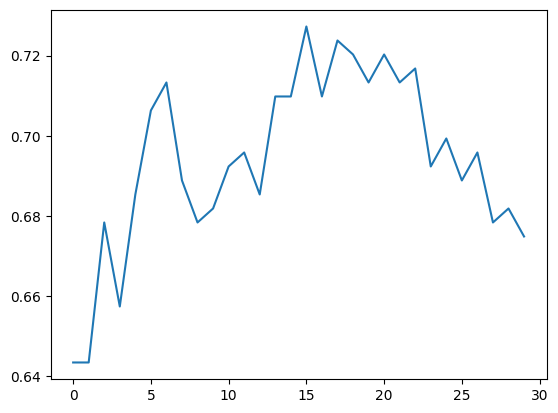

In [11]:
# getting the best knn neighbor number
score = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_pred, y_test))
sns.lineplot(score)

In [24]:
best_knn = np.argmax(score) + 1
KNN_score = np.max(score)
print(f'Best neighboring option number is: {best_knn}')
print(f'And in this case, the best accuracy score achieved by KNN is: {KNN_score}')

Best neighboring option number is: 16
And in this case, the best accuracy score achieved by KNN is: 0.7272727272727273


In [25]:
algo_compare = []
algo_compare.append(KNN_score)

[0.7272727272727273]

In [30]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred2 = logreg.predict(x_test)
LR = metrics.accuracy_score(y_pred2, y_test)
algo_compare.append(LR)

0.7972027972027972

In [31]:
# GaussianNB Algorithm
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(x_train, y_train)
y_pred3 = gauss.predict(x_test)
GR = metrics.accuracy_score(y_pred3, y_test)
algo_compare.append(GR)

0.7902097902097902

In [33]:
algo_compare

[0.7272727272727273, 0.7972027972027972, 0.7902097902097902]

In [35]:
compare_result = {'KNeighborsClassifier': algo_compare[0], 'LogisticRegression': algo_compare[1], 'GaussianNB': algo_compare[2]}
compare_result
# result:

{'KNeighborsClassifier': 0.7272727272727273,
 'LogisticRegression': 0.7972027972027972,
 'GaussianNB': 0.7902097902097902}

@ 2023 Nikolai Peisong Li. All rights reserved.